# Capstone Project - Battle of the Neighborhoods

# Introduction

**Where would I find a certain cuisine of my choice in the city of Madrid, Spain? This project will look at the districts in Madrid and the types of restaurants in those districts. I was planning to travel to Madrid pre-covid and so decided to look at the different cuisines available in the city and where these restaurants are located. I am hoping my fellow tourists may also be interested to know what type of food is available in which area of the city.**<br> 
**Madrid is the capital and most-populous city of Spain. In 2018, Madrid received 10.21 million tourists of which 53.3% were international tourists. There are many art museums, cultural centers, and bullfighting events. The main annual international events held in Madrid are cycling and tennis Madrid Open. Since 2019, it also hosts Davis Cup which is the finals of the major tournament between men’s national teams.**  


## Import Required Libraries

In [1]:
# Import required Libraries

import numpy as np # Library to handle data 

import pandas as pd    # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from pandas import DataFrame  # for pandas Dataframe
!conda install -c conda-forge lxml --yes 

import json  # transform JSON files to pandas dataframe

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim   # retrieve latitude and longitude for a given address

import requests   # library to handle requests
from pandas.io.json import json_normalize  # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm   # Matplotlib and its plotting modules
import matplotlib.colors as colors

import seaborn as sns   # Visualization using Seaborn
from matplotlib import pyplot as plt   # Visualization using Matplotlib


from sklearn.cluster import KMeans  # import k-means for clustering 

#!conda install -c conda-forge folium=0.5.0 --yes  
import folium              # library for mapping

import warnings   # to filter warnings
warnings.filterwarnings("ignore")

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


## Importing Data

In [2]:
# Load district data table html file from Wikipedia into a dataframe df
df = pd.read_html('https://en.wikipedia.org/wiki/Districts_of_Madrid' )[1]
df

,District Number,Name,District area[n 1] (Ha.),Population,Population density(Hab./Ha.),Location,Administrative wards
0,1.0,Centro,522.82,131928,252.34,NaN,Palacio (11)Embajadores (12)Cortes (13)Justici...
1,2.0,Arganzuela,646.22,151965,235.16,NaN,Imperial (21)Acacias (22)Chopera (23)Legazpi (...
2,3.0,Retiro,546.62,118516,216.82,NaN,Pacífico (31)Adelfas (32)Estrella (33)Ibiza (3...
3,4.0,Salamanca,539.24,143800,266.67,NaN,Recoletos (41)Goya (42)Fuente del Berro (43)Gu...
4,5.0,Chamartín,917.55,143424,156.31,NaN,El Viso (51)Prosperidad (52)Ciudad Jardín (53)...
5,6.0,Tetuán,537.47,153789,286.13,NaN,Bellas Vistas (61)Cuatro Caminos (62)Castillej...
6,7.0,Chamberí,467.92,137401,293.64,NaN,Gaztambide (71)Arapiles (72)Trafalgar (73)Alma...
7,8.0,Fuencarral-El Pardo,23783.84,238756,10.04,NaN,El Pardo (81)Fuentelarreina (82)Peñagrande (83...
8,9.0,Moncloa-Aravaca,4653.11,116903,25.12,NaN,Casa de Campo (91)Argüelles (92)Ciudad Univers...
9,10.0,Latina,2542.72,233808,91.95,NaN,Los Cármenes (101)Puerta del Ángel (102)Lucero...


#### There are 20 Districts and many Administrative wards in each district in Madrid

## Exploring Data

In [3]:
# Show the numbers of rows and columns
df.shape

(22, 7)

In [4]:
#Display information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   District Number               21 non-null     float64
 1   Name                          22 non-null     object 
 2   District area[n 1] (Ha.)      22 non-null     float64
 3   Population                    22 non-null     int64  
 4   Population density(Hab./Ha.)  22 non-null     float64
 5   Location                      0 non-null      float64
 6   Administrative wards          21 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.3+ KB


In [5]:
#Drop the columns that are not needed for analysis
df.drop(["District area[n 1] (Ha.)", "Population", "Location", "Population density(Hab./Ha.)"], axis=1, inplace=True)

# Drop last row which has total and NaN
df.drop([21], inplace=True)

#Display dataframe
df

,District Number,Name,Administrative wards
0,1.0,Centro,Palacio (11)Embajadores (12)Cortes (13)Justici...
1,2.0,Arganzuela,Imperial (21)Acacias (22)Chopera (23)Legazpi (...
2,3.0,Retiro,Pacífico (31)Adelfas (32)Estrella (33)Ibiza (3...
3,4.0,Salamanca,Recoletos (41)Goya (42)Fuente del Berro (43)Gu...
4,5.0,Chamartín,El Viso (51)Prosperidad (52)Ciudad Jardín (53)...
5,6.0,Tetuán,Bellas Vistas (61)Cuatro Caminos (62)Castillej...
6,7.0,Chamberí,Gaztambide (71)Arapiles (72)Trafalgar (73)Alma...
7,8.0,Fuencarral-El Pardo,El Pardo (81)Fuentelarreina (82)Peñagrande (83...
8,9.0,Moncloa-Aravaca,Casa de Campo (91)Argüelles (92)Ciudad Univers...
9,10.0,Latina,Los Cármenes (101)Puerta del Ángel (102)Lucero...


#### Using geopy get the Longitude and Latitude of Madrid and all the districts

In [6]:
# Display Longitude and Latitude of Madrid
address='Madrid'
geolocator = Nominatim(user_agent="Madrid_food")
location= geolocator.geocode(address)
latitude= location.latitude
longitude = location.longitude
print('Madrid Coordinates are {}, {}.'.format(latitude, longitude))

Madrid Coordinates are 40.4167047, -3.7035825.


In [7]:
# Find coordinates of all the disticts in Madrid
df['dist_coord']=df['Name'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']]=df['dist_coord'].apply(pd.Series)

# Display dataframe with districts and their coordinates
df

,District Number,Name,Administrative wards,dist_coord,Latitude,Longitude
0,1.0,Centro,Palacio (11)Embajadores (12)Cortes (13)Justici...,"(47.5490251, 1.7324062)",47.549025,1.732406
1,2.0,Arganzuela,Imperial (21)Acacias (22)Chopera (23)Legazpi (...,"(40.3969535, -3.6972891)",40.396954,-3.697289
2,3.0,Retiro,Pacífico (31)Adelfas (32)Estrella (33)Ibiza (3...,"(6.06171475, -75.51064152773847)",6.061715,-75.510642
3,4.0,Salamanca,Recoletos (41)Goya (42)Fuente del Berro (43)Gu...,"(40.9651572, -5.6640182)",40.965157,-5.664018
4,5.0,Chamartín,El Viso (51)Prosperidad (52)Ciudad Jardín (53)...,"(40.7018688, -4.9570085)",40.701869,-4.957008
5,6.0,Tetuán,Bellas Vistas (61)Cuatro Caminos (62)Castillej...,"(40.4605781, -3.6982806)",40.460578,-3.698281
6,7.0,Chamberí,Gaztambide (71)Arapiles (72)Trafalgar (73)Alma...,"(45.5662672, 5.9203636)",45.566267,5.920364
7,8.0,Fuencarral-El Pardo,El Pardo (81)Fuentelarreina (82)Peñagrande (83...,"(40.55634555, -3.7785905137518054)",40.556346,-3.778591
8,9.0,Moncloa-Aravaca,Casa de Campo (91)Argüelles (92)Ciudad Univers...,"(40.43949485, -3.7442035396547055)",40.439495,-3.744204
9,10.0,Latina,Los Cármenes (101)Puerta del Ángel (102)Lucero...,"(41.45952605, 13.012591212188894)",41.459526,13.012591


#### Create a map of Madrid diplaying all the districts 

In [8]:
# Create map of Madrid using latitude and longitude values
map_madrid = folium.Map(location=[latitude, longitude], zoom_start=10)

# Add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Name']):

    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_madrid)  
    
map_madrid

### Use Foursquare Credentials to get venues in the districts

In [9]:
# @hidden_cell
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [10]:
#For index 1 Arganzuela District Name
neighborhood_latitude = df.loc[1, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[1, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[1, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Arganzuela are 40.3969535, -3.6972891.


In [11]:
# From Foursquare get the venues using Latitude and Longitude 

LIMIT = 1000 # limit of number of venues returned by Foursquare API

radius = 5000 # define radius (5000 meters is about 3 miles)

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()


In [12]:
# Define function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
# Display venue name and category 
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Tres Cerditos,Chinese Restaurant,40.397316,-3.694184
1,Matadero Madrid,Art Gallery,40.392270,-3.697500
2,Trattoria In Crescendo,Italian Restaurant,40.394582,-3.698388
3,Madrid Río (Sector Sur),Park,40.394509,-3.702607
4,Salón de Té Al Yabal,Cocktail Bar,40.399015,-3.700249


In [14]:
# Print number of venues for certain district 
print('{} venues for Index 1 District were returned by Foursquare.'.format(nearby_venues.shape[1]))

4 venues for Index 1 District were returned by Foursquare.


In [15]:
# Define function to retreive venues in all the districts
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
# Call the function to display venues for all the districts
madrid_venues = getNearbyVenues(names=df['Name'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Centro
Arganzuela
Retiro
Salamanca
Chamartín
Tetuán
Chamberí
Fuencarral-El Pardo
Moncloa-Aravaca
Latina
Carabanchel
Usera
Puente de Vallecas
Moratalaz
Ciudad Lineal
Hortaleza
Villaverde
Villa de Vallecas
Vicálvaro
San Blas-Canillejas
Barajas


In [17]:
# Display venues for all the districts
madrid_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arganzuela,40.396954,-3.697289,Tres Cerditos,40.397316,-3.694184,Chinese Restaurant
1,Arganzuela,40.396954,-3.697289,Go Hyang Mat,40.396512,-3.699201,Korean Restaurant
2,Arganzuela,40.396954,-3.697289,Trattoria In Crescendo,40.394582,-3.698388,Italian Restaurant
3,Arganzuela,40.396954,-3.697289,Las tinajas,40.396993,-3.697779,Tapas Restaurant
4,Arganzuela,40.396954,-3.697289,Salón de Té Al Yabal,40.399015,-3.700249,Cocktail Bar


In [18]:
# Display number of unique venue categories in all districts
columns = ['Venue','Venue Category']
madrid_venues[columns].groupby(madrid_venues['Neighborhood']).nunique()

,Venue,Venue Category
Neighborhood,,
Arganzuela,34,25
Barajas,45,26
Carabanchel,14,10
Chamartín,1,1
Chamberí,21,16
Ciudad Lineal,29,20
Hortaleza,19,16
Moncloa-Aravaca,3,3
Moratalaz,16,13


In [19]:
# Display unique categories for ALL venues 
print('There are {} unique categories.'.format(len(madrid_venues['Venue Category'].unique())))

There are 95 unique categories.


In [20]:
#Display venues that are ONLY RESTAURANTS
madrid_rest=madrid_venues[madrid_venues['Venue Category'].str.contains('Restaurant')
                          .reset_index(drop=True)]
madrid_rest.index= np.arange(1, len(madrid_rest)+1)

In [21]:
# Create a dataframe of the restaurants and their count
madrid_rest['Venue Category'].value_counts().to_frame()

,Venue Category
Spanish Restaurant,30
Tapas Restaurant,22
Restaurant,16
Asian Restaurant,6
Seafood Restaurant,5
Chinese Restaurant,5
Argentinian Restaurant,4
Japanese Restaurant,2
Sushi Restaurant,2
Mediterranean Restaurant,2


In [22]:
# Only unique number of restaurants
print('There are {} unique categories.'.format(len(madrid_rest['Venue Category'].unique())))

There are 20 unique categories.


In [23]:
# List Top 10 types of restaurants
madrid_rest_Top10 = madrid_rest['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
madrid_rest_Top10 = madrid_rest_Top10.reset_index()

madrid_rest_Top10.rename(index=str, columns={'index':"Venue Category", 'frequency': "Frequency"}, inplace = True)
madrid_rest_Top10

,Venue Category,Frequency
0,Spanish Restaurant,30
1,Tapas Restaurant,22
2,Restaurant,16
3,Asian Restaurant,6
4,Seafood Restaurant,5
5,Chinese Restaurant,5
6,Argentinian Restaurant,4
7,Japanese Restaurant,2
8,Sushi Restaurant,2
9,Mediterranean Restaurant,2


### Visualize Top 10 types of restaurants in Madrid

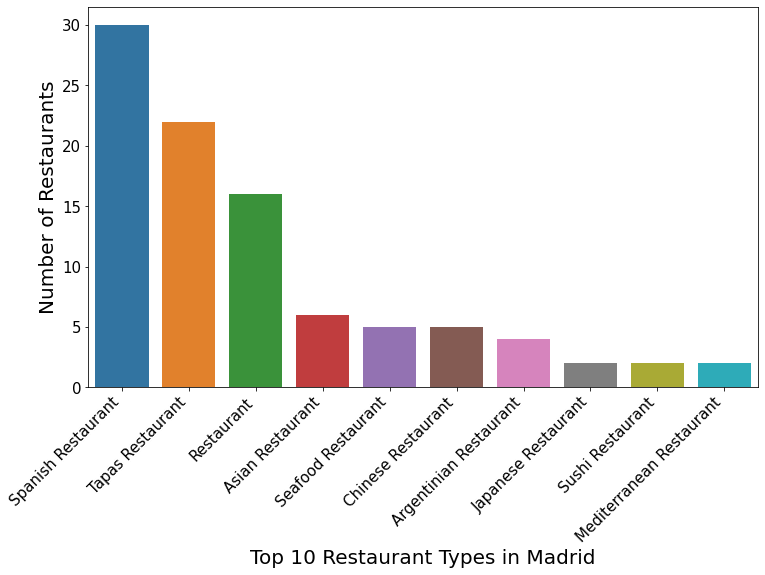

In [24]:
# Display a barplot of Top 10 Restaurant types in Madrid

# Set figure
plt.figure(figsize=(12,7))
# Set sns style for the plot
#sns.set_style('darkgrid')

# Display a countplot  
sns.barplot(x='Venue Category', y= 'Frequency',data=madrid_rest_Top10)

# Set ticks for x and y axis
plt.xticks(rotation=45,ha='right',fontsize=15)
plt.yticks(fontsize=15)
# Set labels for x and y axis, and title
plt.xlabel('Top 10 Restaurant Types in Madrid',fontsize=20)
plt.ylabel('Number of Restaurants',fontsize=20)

# Show the plot
plt.show()

In [25]:
madrid_rest.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Arganzuela,40.396954,-3.697289,Tres Cerditos,40.397316,-3.694184,Chinese Restaurant
2,Arganzuela,40.396954,-3.697289,Go Hyang Mat,40.396512,-3.699201,Korean Restaurant
3,Arganzuela,40.396954,-3.697289,Trattoria In Crescendo,40.394582,-3.698388,Italian Restaurant
4,Arganzuela,40.396954,-3.697289,Las tinajas,40.396993,-3.697779,Tapas Restaurant
5,Arganzuela,40.396954,-3.697289,Casa Maxi,40.398272,-3.697815,Restaurant


In [26]:
#Create a dataframe for only restaurants
madrid_grp_rest = madrid_rest.groupby(['Neighborhood'])['Venue Category'].apply (lambda x: x[x.str.contains('Restaurant')].count())
                          

In [27]:
madrid_grp_rest

Neighborhood
Arganzuela             13
Barajas                17
Carabanchel             7
Chamberí                1
Ciudad Lineal          10
Hortaleza               3
Moratalaz               1
Puente de Vallecas      3
Salamanca              17
San Blas-Canillejas     4
Tetuán                 18
Usera                   7
Vicálvaro               1
Villa de Vallecas       4
Villaverde              1
Name: Venue Category, dtype: int64

In [28]:
# one hot encoding for restaurants
madrid_onehot = pd.get_dummies(madrid_rest[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
madrid_onehot['Neighborhood'] = madrid_rest['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [madrid_onehot.columns[-1]] + list(madrid_onehot.columns[:-1])
madrid_onehot = madrid_onehot[fixed_columns]

madrid_onehot.head()

,Neighborhood,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Himalayan Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Turkish Restaurant
1,Arganzuela,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Arganzuela,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Arganzuela,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Arganzuela,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,Arganzuela,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [29]:
madrid_onehot.shape

(107, 21)

In [30]:
madrid_oh_grp = madrid_onehot.groupby('Neighborhood').mean().reset_index()
madrid_oh_grp

,Neighborhood,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Himalayan Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Turkish Restaurant
0,Arganzuela,0.000000,0.000000,0.000000,0.076923,0.076923,0.000000,0.0,0.000000,0.076923,0.000000,0.076923,0.076923,0.000000,0.000000,0.153846,0.000000,0.153846,0.000000,0.307692,0.000000
1,Barajas,0.117647,0.058824,0.000000,0.000000,0.000000,0.058824,0.0,0.058824,0.000000,0.058824,0.000000,0.000000,0.058824,0.000000,0.117647,0.000000,0.294118,0.000000,0.117647,0.058824
2,Carabanchel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.285714,0.000000,0.428571,0.000000
3,Chamberí,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Ciudad Lineal,0.200000,0.000000,0.000000,0.100000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.500000,0.000000,0.100000,0.000000
5,Hortaleza,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.000000
6,Moratalaz,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
7,Puente de Vallecas,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000
8,Salamanca,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.058824,0.235294,0.000000,0.294118,0.000000,0.352941,0.000000
9,San Blas-Canillejas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.500000,0.000000,0.000000,0.250000,0.000000


In [31]:
#Let's print each neighborhood along with the top 10 most common restaurants
num_top_rest = 10

for hood in madrid_oh_grp['Neighborhood']:
    print("----"+hood+"----")
    temp = madrid_oh_grp[madrid_oh_grp['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['restaurant type','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_rest))
    print('\n')

----Arganzuela----
            restaurant type  freq
0          Tapas Restaurant  0.31
1        Spanish Restaurant  0.15
2                Restaurant  0.15
3         Korean Restaurant  0.08
4        Chinese Restaurant  0.08
5        Falafel Restaurant  0.08
6        Italian Restaurant  0.08
7  Mediterranean Restaurant  0.08
8        Mexican Restaurant  0.00
9          Sushi Restaurant  0.00


----Barajas----
          restaurant type  freq
0      Spanish Restaurant  0.29
1  Argentinian Restaurant  0.12
2        Tapas Restaurant  0.12
3              Restaurant  0.12
4     Japanese Restaurant  0.06
5      Mexican Restaurant  0.06
6        Asian Restaurant  0.06
7      Turkish Restaurant  0.06
8    Himalayan Restaurant  0.06
9    Fast Food Restaurant  0.06


----Carabanchel----
             restaurant type  freq
0           Tapas Restaurant  0.43
1         Spanish Restaurant  0.29
2                 Restaurant  0.29
3     Argentinian Restaurant  0.00
4           Asian Restaurant  0.00
5    

In [32]:
# Create funtion for most common restaurants
def return_most_common_rest(row, num_top_rest):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_rest]

In [33]:
# Display top 10 restaurants in the district
num_top_rest = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_rest):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
neighborhoods_rest_sorted = pd.DataFrame(columns=columns)
neighborhoods_rest_sorted['Neighborhood'] = madrid_oh_grp['Neighborhood']

for ind in np.arange(madrid_oh_grp.shape[0]):
    neighborhoods_rest_sorted.iloc[ind, 1:] = return_most_common_rest(madrid_oh_grp.iloc[ind, :], num_top_rest)

neighborhoods_rest_sorted.head()

,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Arganzuela,Tapas Restaurant,Spanish Restaurant,Restaurant,Chinese Restaurant,Falafel Restaurant,Mediterranean Restaurant,Korean Restaurant,Italian Restaurant,Turkish Restaurant,French Restaurant
1,Barajas,Spanish Restaurant,Argentinian Restaurant,Tapas Restaurant,Restaurant,Asian Restaurant,Fast Food Restaurant,Himalayan Restaurant,Turkish Restaurant,Mexican Restaurant,Japanese Restaurant
2,Carabanchel,Tapas Restaurant,Spanish Restaurant,Restaurant,Turkish Restaurant,Himalayan Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant
3,Chamberí,French Restaurant,Turkish Restaurant,Tapas Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,Himalayan Restaurant,Italian Restaurant
4,Ciudad Lineal,Spanish Restaurant,Argentinian Restaurant,Restaurant,Chinese Restaurant,Tapas Restaurant,Himalayan Restaurant,Asian Restaurant,Brazilian Restaurant,Falafel Restaurant,Fast Food Restaurant


# Clustering

### Use Elbow Method to find the k-value

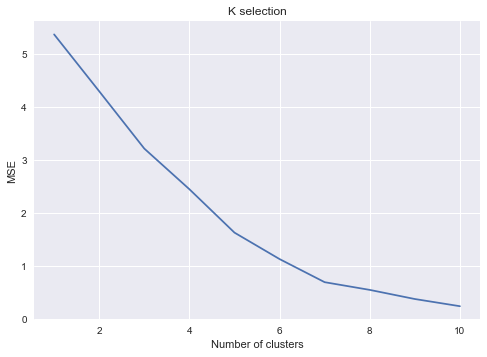

In [34]:
# Finding best k
plt.style.use("seaborn")
Ks = 11
mse = np.zeros((Ks-1))
madrid_oh_grp_clust = madrid_oh_grp.drop('Neighborhood', 1)

for n in range(1,Ks):
    
    # set number of clusters
    kclusters = n
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0, init = 'random', n_init = 15).fit(madrid_oh_grp_clust)
    mse[n-1] = kmeans.inertia_

plt.plot(range(1,Ks),mse)
plt.xlabel("Number of clusters")
plt.ylabel("MSE")
plt.title("K selection")
plt.show()

In [35]:
# set number of clusters. Will use kcluster = 6 according to elbow method
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(madrid_oh_grp_clust)

# check cluster labels generated for each row in the dataframe
# kmeans.labels_[0:10] 
kmeans.labels_[0:] 

array([0, 0, 0, 1, 5, 5, 3, 0, 0, 2, 2, 2, 4, 0, 5])

In [36]:
#rename 'Name' column to "Neighborhood" and create a new dataframe
df=df.rename(columns={'Name':'Neighborhood'})

df  # display dataframe

,District Number,Neighborhood,Administrative wards,dist_coord,Latitude,Longitude
0,1.0,Centro,Palacio (11)Embajadores (12)Cortes (13)Justici...,"(47.5490251, 1.7324062)",47.549025,1.732406
1,2.0,Arganzuela,Imperial (21)Acacias (22)Chopera (23)Legazpi (...,"(40.3969535, -3.6972891)",40.396954,-3.697289
2,3.0,Retiro,Pacífico (31)Adelfas (32)Estrella (33)Ibiza (3...,"(6.06171475, -75.51064152773847)",6.061715,-75.510642
3,4.0,Salamanca,Recoletos (41)Goya (42)Fuente del Berro (43)Gu...,"(40.9651572, -5.6640182)",40.965157,-5.664018
4,5.0,Chamartín,El Viso (51)Prosperidad (52)Ciudad Jardín (53)...,"(40.7018688, -4.9570085)",40.701869,-4.957008
5,6.0,Tetuán,Bellas Vistas (61)Cuatro Caminos (62)Castillej...,"(40.4605781, -3.6982806)",40.460578,-3.698281
6,7.0,Chamberí,Gaztambide (71)Arapiles (72)Trafalgar (73)Alma...,"(45.5662672, 5.9203636)",45.566267,5.920364
7,8.0,Fuencarral-El Pardo,El Pardo (81)Fuentelarreina (82)Peñagrande (83...,"(40.55634555, -3.7785905137518054)",40.556346,-3.778591
8,9.0,Moncloa-Aravaca,Casa de Campo (91)Argüelles (92)Ciudad Univers...,"(40.43949485, -3.7442035396547055)",40.439495,-3.744204
9,10.0,Latina,Los Cármenes (101)Puerta del Ángel (102)Lucero...,"(41.45952605, 13.012591212188894)",41.459526,13.012591


In [37]:
# Sort dataframe in alphabetical order
sorted_df = df.sort_values(by='Neighborhood', ascending=True)
sorted_df

,District Number,Neighborhood,Administrative wards,dist_coord,Latitude,Longitude
1,2.0,Arganzuela,Imperial (21)Acacias (22)Chopera (23)Legazpi (...,"(40.3969535, -3.6972891)",40.396954,-3.697289
20,21.0,Barajas,Alameda de Osuna (211)Aeropuerto (212)Casco Hi...,"(40.4733176, -3.5798446)",40.473318,-3.579845
10,11.0,Carabanchel,Comillas (111)Opañel (112)San Isidro (113)Vist...,"(40.3742112, -3.744676)",40.374211,-3.744676
0,1.0,Centro,Palacio (11)Embajadores (12)Cortes (13)Justici...,"(47.5490251, 1.7324062)",47.549025,1.732406
4,5.0,Chamartín,El Viso (51)Prosperidad (52)Ciudad Jardín (53)...,"(40.7018688, -4.9570085)",40.701869,-4.957008
6,7.0,Chamberí,Gaztambide (71)Arapiles (72)Trafalgar (73)Alma...,"(45.5662672, 5.9203636)",45.566267,5.920364
14,15.0,Ciudad Lineal,Ventas (151)Pueblo Nuevo (152)Quintana (153)Co...,"(40.4484305, -3.650495)",40.448431,-3.650495
7,8.0,Fuencarral-El Pardo,El Pardo (81)Fuentelarreina (82)Peñagrande (83...,"(40.55634555, -3.7785905137518054)",40.556346,-3.778591
15,16.0,Hortaleza,Palomas (161)Piovera (162)Canillas (163)Pinar ...,"(40.4725491, -3.6425515)",40.472549,-3.642552
9,10.0,Latina,Los Cármenes (101)Puerta del Ángel (102)Lucero...,"(41.45952605, 13.012591212188894)",41.459526,13.012591


In [38]:
# Add cluster labels
neighborhoods_rest_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

madrid_merged = df

madrid_merged = madrid_merged.join(neighborhoods_rest_sorted.set_index('Neighborhood'), on='Neighborhood')

madrid_merged.head()

,District Number,Neighborhood,Administrative wards,dist_coord,Latitude,Longitude,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,1.0,Centro,Palacio (11)Embajadores (12)Cortes (13)Justici...,"(47.5490251, 1.7324062)",47.549025,1.732406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Arganzuela,Imperial (21)Acacias (22)Chopera (23)Legazpi (...,"(40.3969535, -3.6972891)",40.396954,-3.697289,0.0,Tapas Restaurant,Spanish Restaurant,Restaurant,Chinese Restaurant,Falafel Restaurant,Mediterranean Restaurant,Korean Restaurant,Italian Restaurant,Turkish Restaurant,French Restaurant
2,3.0,Retiro,Pacífico (31)Adelfas (32)Estrella (33)Ibiza (3...,"(6.06171475, -75.51064152773847)",6.061715,-75.510642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Salamanca,Recoletos (41)Goya (42)Fuente del Berro (43)Gu...,"(40.9651572, -5.6640182)",40.965157,-5.664018,0.0,Tapas Restaurant,Spanish Restaurant,Restaurant,Middle Eastern Restaurant,Italian Restaurant,Turkish Restaurant,French Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant
4,5.0,Chamartín,El Viso (51)Prosperidad (52)Ciudad Jardín (53)...,"(40.7018688, -4.9570085)",40.701869,-4.957008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Change NaN and float to integer for cluster labels

madrid_merged['Cluster Labels'] = madrid_merged['Cluster Labels'].fillna(0).astype(np.int64)
madrid_merged['Cluster Labels'] = madrid_merged['Cluster Labels'].astype(np.int64)

In [40]:
# Display top 5 rows
madrid_merged.head()

,District Number,Neighborhood,Administrative wards,dist_coord,Latitude,Longitude,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,1.0,Centro,Palacio (11)Embajadores (12)Cortes (13)Justici...,"(47.5490251, 1.7324062)",47.549025,1.732406,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Arganzuela,Imperial (21)Acacias (22)Chopera (23)Legazpi (...,"(40.3969535, -3.6972891)",40.396954,-3.697289,0,Tapas Restaurant,Spanish Restaurant,Restaurant,Chinese Restaurant,Falafel Restaurant,Mediterranean Restaurant,Korean Restaurant,Italian Restaurant,Turkish Restaurant,French Restaurant
2,3.0,Retiro,Pacífico (31)Adelfas (32)Estrella (33)Ibiza (3...,"(6.06171475, -75.51064152773847)",6.061715,-75.510642,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Salamanca,Recoletos (41)Goya (42)Fuente del Berro (43)Gu...,"(40.9651572, -5.6640182)",40.965157,-5.664018,0,Tapas Restaurant,Spanish Restaurant,Restaurant,Middle Eastern Restaurant,Italian Restaurant,Turkish Restaurant,French Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant
4,5.0,Chamartín,El Viso (51)Prosperidad (52)Ciudad Jardín (53)...,"(40.7018688, -4.9570085)",40.701869,-4.957008,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# create map showing clusters of restaurants in districts
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(madrid_merged['Latitude'], madrid_merged['Longitude'], madrid_merged['Neighborhood'], madrid_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

### Cluster 1

In [42]:
# Display cluster 1
madrid_merged.loc[madrid_merged['Cluster Labels'] == 0, madrid_merged.columns[[1] + list(range(5, madrid_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,Centro,1.732406,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arganzuela,-3.697289,0,Tapas Restaurant,Spanish Restaurant,Restaurant,Chinese Restaurant,Falafel Restaurant,Mediterranean Restaurant,Korean Restaurant,Italian Restaurant,Turkish Restaurant,French Restaurant
2,Retiro,-75.510642,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Salamanca,-5.664018,0,Tapas Restaurant,Spanish Restaurant,Restaurant,Middle Eastern Restaurant,Italian Restaurant,Turkish Restaurant,French Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant
4,Chamartín,-4.957008,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fuencarral-El Pardo,-3.778591,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Moncloa-Aravaca,-3.744204,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Latina,13.012591,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Carabanchel,-3.744676,0,Tapas Restaurant,Spanish Restaurant,Restaurant,Turkish Restaurant,Himalayan Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant
12,Puente de Vallecas,-3.654535,0,Asian Restaurant,Spanish Restaurant,Tapas Restaurant,Turkish Restaurant,Italian Restaurant,Brazilian Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant


In [43]:
# Drop rows which has NaN
madrid_merged.drop([0], inplace=True)
madrid_merged.drop([2], inplace=True)
madrid_merged.drop([4], inplace=True)

madrid_merged.drop([7], inplace=True)
madrid_merged.drop([8], inplace=True)
madrid_merged.drop([9], inplace=True)


### Cluster 2

In [44]:
# Display cluster 2
madrid_merged.loc[madrid_merged['Cluster Labels'] == 1, madrid_merged.columns[[1] + list(range(5, madrid_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
6,Chamberí,5.920364,1,French Restaurant,Turkish Restaurant,Tapas Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,Himalayan Restaurant,Italian Restaurant


### Cluster 3

In [45]:
# Display cluster 3
madrid_merged.loc[madrid_merged['Cluster Labels'] == 2, madrid_merged.columns[[1] + list(range(5, madrid_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
5,Tetuán,-3.698281,2,Spanish Restaurant,Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Japanese Restaurant,Sushi Restaurant,Seafood Restaurant,Himalayan Restaurant,Falafel Restaurant
11,Usera,-3.706446,2,Seafood Restaurant,Asian Restaurant,Spanish Restaurant,Restaurant,Chinese Restaurant,Fast Food Restaurant,Turkish Restaurant,Himalayan Restaurant,Brazilian Restaurant,Falafel Restaurant
19,San Blas-Canillejas,-3.604002,2,Seafood Restaurant,Restaurant,Tapas Restaurant,Turkish Restaurant,Himalayan Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant


### Cluster 4

In [46]:
# Display cluster 4 
madrid_merged.loc[madrid_merged['Cluster Labels'] == 3, madrid_merged.columns[[1] + list(range(5, madrid_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
13,Moratalaz,-3.644874,3,Sushi Restaurant,Turkish Restaurant,Italian Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Himalayan Restaurant


### Cluster 5

In [47]:
# Display cluster 5
madrid_merged.loc[madrid_merged['Cluster Labels'] == 4, madrid_merged.columns[[1] + list(range(5, madrid_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
18,Vicálvaro,-3.576622,4,Mediterranean Restaurant,Turkish Restaurant,Italian Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Himalayan Restaurant


### Cluster 6

In [48]:
# Display cluster 6
madrid_merged.loc[madrid_merged['Cluster Labels'] == 5, madrid_merged.columns[[1] + list(range(5, madrid_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
14,Ciudad Lineal,-3.650495,5,Spanish Restaurant,Argentinian Restaurant,Restaurant,Chinese Restaurant,Tapas Restaurant,Himalayan Restaurant,Asian Restaurant,Brazilian Restaurant,Falafel Restaurant,Fast Food Restaurant
15,Hortaleza,-3.642552,5,Spanish Restaurant,Tapas Restaurant,Turkish Restaurant,Italian Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant
16,Villaverde,-3.695956,5,Spanish Restaurant,Turkish Restaurant,Italian Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Himalayan Restaurant


In [49]:
madrid_grp_rest_df = madrid_grp_rest.to_frame().reset_index()
madrid_grp_rest_df.columns = ['Neighborhood', 'Num of Restaurant']
madrid_grp_rest_df.index = np.arange (1, len(madrid_grp_rest_df)+1)
list_rest_num = madrid_grp_rest_df['Num of Restaurant'].to_list()
list_dist = madrid_grp_rest_df['Neighborhood'].to_list()

In [50]:
# create a map with folium that shows high number of restaurants with increased size of cluster
map_restaurants10 = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the five clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(madrid_merged['Latitude'], 
                                  madrid_merged['Longitude'], 
                                  madrid_merged['Neighborhood'], 
                                  madrid_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_num[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

## Conclusion

**Spanish and Tapas restaurants are in most of the neighborhoods. However, if you want Mediterrean cuisine then according to Cluster 1, you may find it in Vicalvaro since it is the most common restaurant in that neighborhood. Similarly, French cuisine may be found in Chamberi district and a Sushi restaurant may be found in Moratalaz district. A lot of districts in Cluster 1 had no restaurant information returned by Foursquare, this may be due to no data in Foursqaure about the restaurants in those districts or the data was not updated.**